Importamos las librerías de interés. QISKit es una librería de IBM para python en la cual podemos ejecutar circuitos tanto en simuladores como en computadoras cuánticas reales.

In [1]:
from qiskit import *
from qiskit import IBMQ
from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy
import matplotlib.pyplot as plt

Creamos un circuito donde el primer qubit (qubit[0]) será el qubit que deseamos transmitir (Alice), el segundo qubit (qubit[1]) lo utilizaremos como auxiliar y el tercer qubit (qubit[2]) será el qubit que consideraremos como destino (Bob).

In [2]:
# Creamos un circuitos cuántico que cuente con 3 bits cuánticos (qubits) y 3 bits clásicos (registros)
circuit = QuantumCircuit(3,3)

# Aplico una compuerta Hadamard al primer qubits para crear el estado cuántico 
# que deseo transmitir, en este caso el estado |1>
circuit.x(0) 

# La barrera sirve exclusivamente para separar el circuito en partes
circuit.barrier() 

# Visualizamos el circuito hasta el momento
print(circuit)

     ┌───┐ ░ 
q_0: ┤ X ├─░─
     └───┘ ░ 
q_1: ──────░─
           ░ 
q_2: ──────░─
           ░ 
c: 3/════════
             


In [3]:
# Creo el estado de Bell entre # Creo el estado de Bell entre 
# Alice y el qubit auxiliar
circuit.h(1)
circuit.cx(1,2)

# La barrera sirve exclusivamente para separar el circuito en partes
circuit.barrier() 

# Visualizamos el circuito hasta el momento
print(circuit)

     ┌───┐ ░            ░ 
q_0: ┤ X ├─░────────────░─
     └───┘ ░ ┌───┐      ░ 
q_1: ──────░─┤ H ├──■───░─
           ░ └───┘┌─┴─┐ ░ 
q_2: ──────░──────┤ X ├─░─
           ░      └───┘ ░ 
c: 3/═════════════════════
                          


In [4]:
# Coloco las compuertas para crear el circuito de teleportación
circuit.cx(0,1)
circuit.h(0)

# La barrera sirve exclusivamente para separar el circuito en partes
circuit.barrier() 

# Visualizamos el circuito hasta el momento
print(circuit)

     ┌───┐ ░            ░      ┌───┐ ░ 
q_0: ┤ X ├─░────────────░───■──┤ H ├─░─
     └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ 
q_1: ──────░─┤ H ├──■───░─┤ X ├──────░─
           ░ └───┘┌─┴─┐ ░ └───┘      ░ 
q_2: ──────░──────┤ X ├─░────────────░─
           ░      └───┘ ░            ░ 
c: 3/══════════════════════════════════
                                       


In [5]:
# Aplico la computerta X a Bob si el valor de Alice es 1 y la compuerta X a Bob  
# si el valor del qubit auxiliar es 1
circuit.cz(0, 2)
circuit.cx(1, 2)

# La barrera sirve exclusivamente para separar el circuito en partes
circuit.barrier() 

# Visualizamos el circuito hasta el momento
print(circuit)

     ┌───┐ ░            ░      ┌───┐ ░          ░ 
q_0: ┤ X ├─░────────────░───■──┤ H ├─░──■───────░─
     └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░  │       ░ 
q_1: ──────░─┤ H ├──■───░─┤ X ├──────░──┼───■───░─
           ░ └───┘┌─┴─┐ ░ └───┘      ░  │ ┌─┴─┐ ░ 
q_2: ──────░──────┤ X ├─░────────────░──■─┤ X ├─░─
           ░      └───┘ ░            ░    └───┘ ░ 
c: 3/═════════════════════════════════════════════
                                                  


In [6]:
# Aplico las mediciones al final del circuito para los 3 qubits guardo sus 
# mediciones en los registros clásicos
circuit.measure([0, 1, 2], [0, 1, 2]) 

# Visualizamos el circuito hasta el momento
print(circuit)

     ┌───┐ ░            ░      ┌───┐ ░          ░ ┌─┐      
q_0: ┤ X ├─░────────────░───■──┤ H ├─░──■───────░─┤M├──────
     └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░  │       ░ └╥┘┌─┐   
q_1: ──────░─┤ H ├──■───░─┤ X ├──────░──┼───■───░──╫─┤M├───
           ░ └───┘┌─┴─┐ ░ └───┘      ░  │ ┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: ──────░──────┤ X ├─░────────────░──■─┤ X ├─░──╫──╫─┤M├
           ░      └───┘ ░            ░    └───┘ ░  ║  ║ └╥┘
c: 3/══════════════════════════════════════════════╩══╩══╩═
                                                   0  1  2 


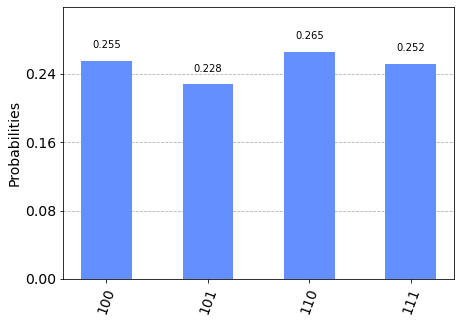

In [7]:
# Asigno el dispositivo en el cual voy a implementar mi circuito, en este caso,
# voy a implementarlo en el 'qasm_simulator' 
backend1 = Aer.get_backend('qasm_simulator')

# Defino la ejecución y le asigno la cantidad de veces que se va a ejecutar 
# circuito (1000 en este caso)
job1 = execute(circuit, backend=backend1, shots=1000)

# Guardo los resultados del experimento en una variable
result1 = job1.result()

# Creo un histograma con las distitas mediciones del experimento
measurement1 = result1.get_counts(circuit)
plot_histogram(measurement1)

In [8]:
# Cargo mi cuenta de IBM para poder implementar el circuito en la computadora
# cuántica provista por IBM
#IBMQ.save_account(#'aquí deben poner el token que sacan de la cuenta de IBM')
IBMQ.save_account('bc0221c2c435408a718744a0e3388325cd4241375e15beefb8909a759a28201db7c6a425e8d07e09e54105e373aceccb175fa8eb46700b4db88ac50dbdc6fa84')
provider = IBMQ.load_account()

configrc.store_credentials:WARNING:2020-09-21 20:58:56,846: Credentials already present. Set overwrite=True to overwrite.
c:\users\agustin\appdata\local\programs\python\python38\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


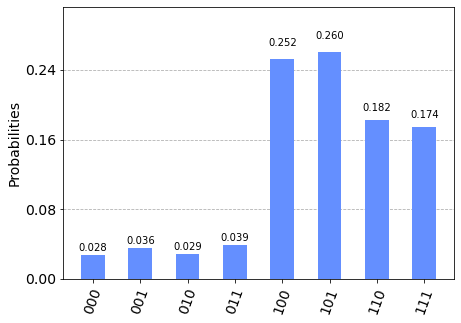

In [9]:
# Asigno el dispositivo en el cual voy a implementar mi circuito, en este caso,
# voy a implementarlo en la computadora cuántica que esté menos ocupada
backend2 = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and not b.configuration().simulator and b.status().operational==True))

# Defino la ejecución y le asigno la cantidad de veces que se va a ejecutar 
# circuito (1000 en este caso)
job2 = execute(circuit, backend=backend2, shots=1000)

# Guardo los resultados del experimento en una variable
result2 = job2.result()

# Creo un histograma con las distitas mediciones del experimento
measurement2 = result2.get_counts(circuit)
plot_histogram(measurement2)

Los resultados son interesantes y es adecuado hacer un análisis: si bien el comportamiento general de los sistemas es similar en ambos casos, podemos ver que en el caso del simulador vemos el estado del bit más significativo (mediciones del tercer qubit) es 1 en todos los casos. Esto ocurre ya que el estado que deseabamos transmitir era el |1>. Por lo tanto evidenciamos que la transmición es perfecta en el 100% de los casos.

Sin embargo, en el caso que implementamos el circuito en una computadora cuántica real vemos casos en los cuales el bit más significativo es 0, los cual quiere decir que la transferencia falla. Esto ocurre ya que estamos trabajando con una computadora cuántica real con errores que se producen debido a problemas a la hora de aislar el sistema. Estos problemas técnicos producen la decoherencia del sistema y hacen que en algunos casos el circuito falle.

Como conclusión, es interesante destacar como con pocas lineas de código podemos implementar facilmente un circuito en una computadora cuántica real y estudiar su comportamiento.